##Práctica Análisis y limpieza


## Ejercicio 1 práctica

La empresa CarMD, dedicada a la venta de autos usados, ha recolectado información sobre el consumo [l/100km], aceleración [seg. de 0 a 100 km/h] y velocidad final [km/h] de cada uno de los vehículos que tiene en venta.

El señor Gunderson, gerente de la empresa, nos ha solicitado efectuar un análisis descriptivo de sus datos, incluyendo la limpieza de los mismos si fuera necesario (ver anexo).

1 - Efectuar un análisis univariante considerando:

* Medidas de posición y dispersión
* Histograma de frecuencias
* Gráfico de cajas y bigotes (box plot)
* Análisis de normalidad con QQ-plot y test de Shapiro Wilk
* Análisis de curtosis

2 - Efectuar un análisis multivariante evaluando:
* Vector de medias, matriz S y matriz R.
* Gráficos de dispersión

Gunderson nos solicitó que tengamos en cuenta el hecho de que cada vehículo pertenece a una clase diferente (estándar o premium), ya que sospecha que pueden tener características diferentes.

3 - Efectuar un nuevo análisis teniendo en cuenta el tipo de vehículo.
* Diagrama de cajas y bigotes estratificado
* Diagramas de dispersión estratificados
* Gráficos en 3D
* ¿Tiene relación la clase de vehículo con sus características?

Analizando los datos, usted recordó que según las nuevas normas en consumo de combustible (ArgenOIL), un auto se considera **ecológico cuando consume menos de 7 lts. de combustible cada 100 km**.

4 - Construya una nueva variable que diferencie los autos ecológicos de los que no lo son. 

5 -  Analice las relaciones de esta nueva variable con las restantes.

A lo largo del proceso usted ha detectado y resuelto algunos problemas en la calidad de los datos, por la presencia de valores atípicos (outliers) y datos faltantes (NA).

6 - Realice un informe de calidad de los datos, donde se describan las actividades de limpieza que se hayan efectuado.

Métodos para la limpieza de datos

### Detección de outliers

7 - Detección univariante de casos atípicos 
* Gráfico de caja y bigotes 
* Estadísticos robustos de la variable 

8 - Detección bivariante de casos atípicos 
* Gráfico de caja y bigotes 
* Gráficos de dispersión 
  
9 - Detección multivariante de casos atípicos 
* Estadísticos basados en distancia
* Análisis de componentes principales

### Métodos para la solución de datos faltantes

Bajo el supuesto de que los datos faltantes (NA, Not Available) se distribuyen aleatoriamente en la muestra, es posible utilizar métodos de supresión o imputación:

**Supresión de datos**
* Aproximación de casos completos o supresión de casos según lista 
* Suprimir casos (filas) o variables (columnas) 
 
**Imputación de la información faltante**
* Imputación por sustitución del caso 
* Imputación de sustitución por la media 
* Imputación de sustitución por la mediana 
* Imputación por regresión 



In [ ]:
import pandas as pd
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

In [ ]:
data = pd.read_csv("/CarMD.csv",sep=',',encoding='latin-1')
data.head()

,Velocidad,Aceleracion,Consumo,Categoría
0,118.397137,11.555540,8.103695,Standard
1,NaN,13.218851,8.788647,Standard
2,256.533405,11.793277,8.053212,Standard
3,208.590670,10.027998,6.956417,Standard
4,189.139549,12.509964,18.989900,Standard


## Calidad de los datos

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Velocidad    96 non-null     float64
 1   Aceleracion  97 non-null     float64
 2   Consumo      97 non-null     float64
 3   Categoría    100 non-null    object 
dtypes: float64(3), object(1)
memory usage: 3.2+ KB


Hay 4 valores nulos en velocidad, 3 nulos en aceleracion y consumo

In [ ]:
#Creamos varibles booleanas para ver si hay variables nulos en las columnas

c_vel_na = data["Velocidad"].isna()
c_al_na = data["Aceleracion"].isna()
c_con_na = data["Consumo"].isna()

In [ ]:
#Selecciona las filas del dataframe donde las tres variables son nulas (Missing Values)

data[c_vel_na & c_al_na & c_con_na]

,Velocidad,Aceleracion,Consumo,Categoría


No hay filas en el Dataframe donde las tres variables sean nulas

In [ ]:
#Selecciona las filas donde solo velocidad sea nulos

data[c_vel_na]

,Velocidad,Aceleracion,Consumo,Categoría
1,NaN,13.218851,8.788647,Standard
26,NaN,12.200881,8.913351,Standard
48,NaN,11.124596,5.683906,Standard
53,NaN,6.014505,7.523838,Premium


In [ ]:
#Reemplaza los valores faltantes (missing values) en la columna Velocidad del dataframe data con la mediana de los valores no faltantes en esa columna. 
#Se seleccionan los valores faltantes mediante la variable booleana c_vel_na.

data.loc[c_vel_na, "Velocidad"] = data.Velocidad.median()

In [ ]:
data[c_con_na]

,Velocidad,Aceleracion,Consumo,Categoría
5,170.921112,12.023867,NaN,Standard
80,212.574344,7.443644,NaN,Premium
99,211.305657,7.456135,NaN,Premium


In [ ]:
data.loc[c_con_na,"Consumo"] = data.Consumo.median()

In [ ]:
data[c_al_na]
data.loc[c_al_na,"Aceleracion"] = data.Aceleracion.median()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Velocidad    100 non-null    float64
 1   Aceleracion  100 non-null    float64
 2   Consumo      100 non-null    float64
 3   Categoría    100 non-null    object 
dtypes: float64(3), object(1)
memory usage: 3.2+ KB


## Medidas de posición





In [ ]:
data.describe()
#Solo incluye columnas númericas.
#Con esto podemos ver si es necesario estandarizar

,Velocidad,Aceleracion,Consumo
count,100.000000,100.000000,100.000000
mean,190.516608,10.113982,8.963916
std,47.460224,2.420913,2.245164
min,40.890000,5.777326,5.652413
25%,160.814625,7.989101,7.517424
50%,193.877013,9.854868,8.430253
75%,219.856314,12.083775,9.843895
max,284.489215,15.037425,18.989900


Cuando las variables tengan distintas escalas/rangos hay que estandarizarlos.
Usarlo en algoritmos basados en distancia.

## Medidas de dispersión

# Varianza
Es una medida de la dispersión de los valores en una columna. 
Cuanto mayor sea la varianza, más dispersos estarán los valores.
Por lo tanto, la varianza es una medida importante de la variabilidad de los datos.

In [ ]:
data.var(numeric_only =True)

Velocidad      2252.472889
Aceleracion       5.860820
Consumo           5.040760
dtype: float64

In [ ]:
data.std(numeric_only=True)

Velocidad      47.460224
Aceleracion     2.420913
Consumo         2.245164
dtype: float64

In [ ]:
#MODA
data.Categoría.value_counts()

Standard    50
Premium     50
Name: Categoría, dtype: int64

In [ ]:
#Descripcion de las variables

data.describe()

,Velocidad,Aceleracion,Consumo
count,100.000000,100.000000,100.000000
mean,190.516608,10.113982,8.963916
std,47.460224,2.420913,2.245164
min,40.890000,5.777326,5.652413
25%,160.814625,7.989101,7.517424
50%,193.877013,9.854868,8.430253
75%,219.856314,12.083775,9.843895
max,284.489215,15.037425,18.989900


Histograma y Boxplots: Distribución de los valores


In [ ]:
sns.set_style('whitegrid')

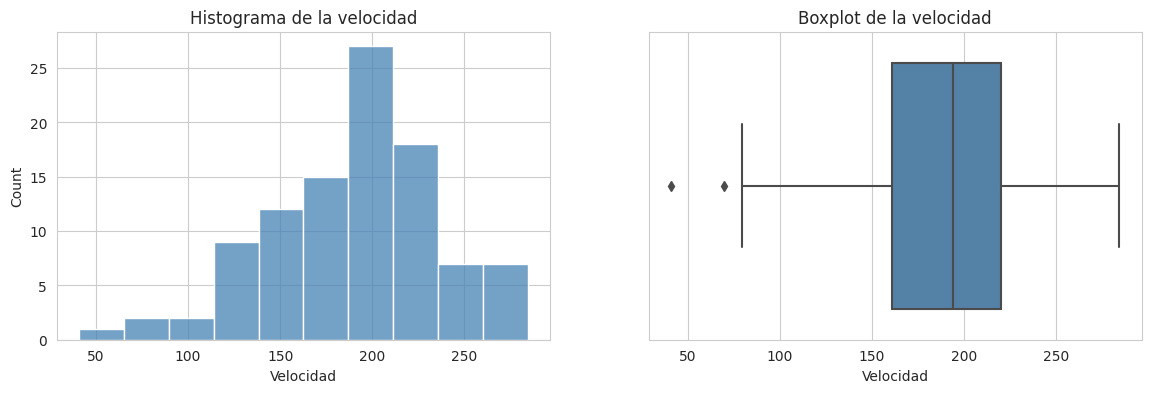

In [ ]:
# Crear una figura con dos subplots lado a lado
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

# Crear un histograma de la variable "Velocidad" en el primer subplot
sns.histplot(data=data, x="Velocidad", ax=ax[0], color="steelblue")
# Agregar un título al primer subplot
ax[0].title.set_text("Histograma de la velocidad")

# Crear un boxplot de la variable "Velocidad" en el segundo subplot
sns.boxplot(data=data, x="Velocidad", ax=ax[1], color="steelblue")
# Agregar un título al segundo subplot
ax[1].title.set_text("Boxplot de la velocidad")

# Mostrar la figura completa
plt.show()

Histograma: Podemos observar que la mayoría de los autos tienen velocidades entre 150 y 200 km/h. La variable tiene una distribucion asimétrica.
Boxplot: Podemos observar 2 outliers por debajo del valor mínimo. 

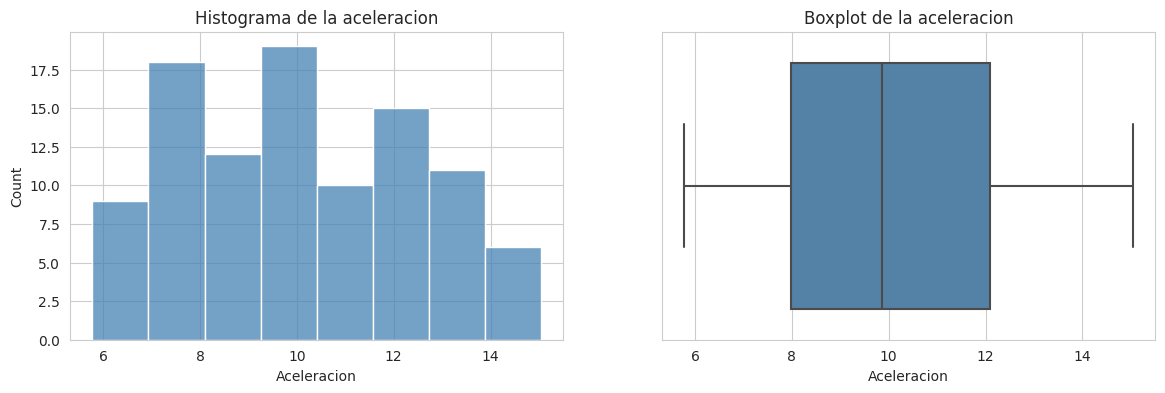

In [ ]:
# Crear una figura con dos subplots lado a lado
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

# Crear un histograma de la variable "Velocidad" en el primer subplot
sns.histplot(data=data, x="Aceleracion", ax=ax[0], color="steelblue")
# Agregar un título al primer subplot
ax[0].title.set_text("Histograma de la aceleracion")

# Crear un boxplot de la variable "Velocidad" en el segundo subplot
sns.boxplot(data=data, x="Aceleracion", ax=ax[1], color="steelblue")
# Agregar un título al segundo subplot
ax[1].title.set_text("Boxplot de la aceleracion")

# Mostrar la figura completa
plt.show()

La variable tiene valores más uniformes. No se observan outliers 

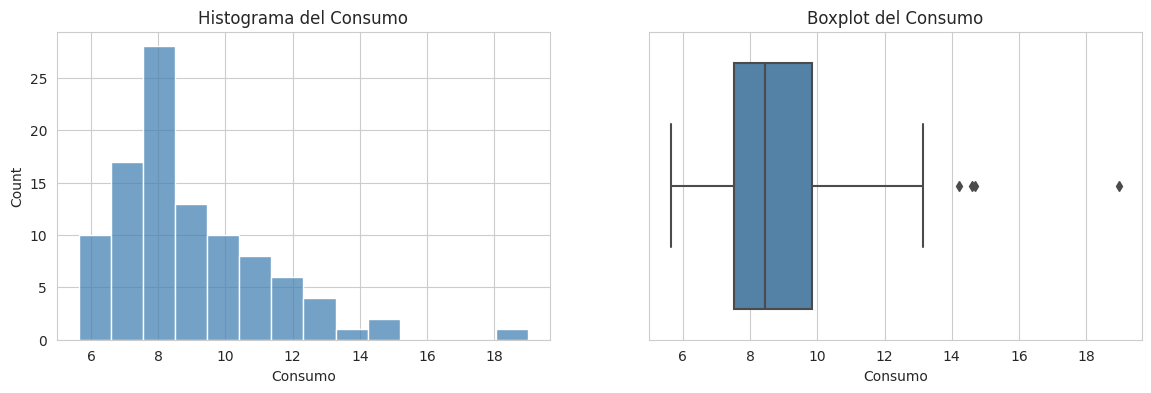

In [ ]:
# Crear una figura con dos subplots lado a lado
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

# Crear un histograma de la variable "Velocidad" en el primer subplot
sns.histplot(data=data, x="Consumo", ax=ax[0], color="steelblue")
# Agregar un título al primer subplot
ax[0].title.set_text("Histograma del Consumo")

# Crear un boxplot de la variable "Velocidad" en el segundo subplot
sns.boxplot(data=data, x="Consumo", ax=ax[1], color="steelblue")
# Agregar un título al segundo subplot
ax[1].title.set_text("Boxplot del Consumo")

# Mostrar la figura completa
plt.show()

En el histograma podemos observar que la mayoría de las observaciones se concentra en valores bajos. Es asimetrica hacia la izquierda. Ademas podemos observar un valor outlier.
En el boxplot se observan varios valores outliers.

## Matriz S

Esta matriz muestra la relación lineal entre cada par de variables, donde un valor cercano a 1 indica una correlación positiva fuerte (es decir, que ambas variables tienden a aumentar o disminuir juntas), un valor cercano a -1 indica una correlación negativa fuerte (es decir, que cuando una variable aumenta,la otra tiende a disminuir) y un valor cercano a 0 indica que no hay una correlación lineal significativa entre las variables.

La matriz de correlación se representa como un dataframe cuadrado, donde las filas y columnas corresponden a las variables numéricas de data, y los valores en cada celda indican el coeficiente de correlación entre la fila y la columna correspondientes. 
La diagonal principal de la matriz siempre tendrá un valor de 1, ya que una variable está perfectamente correlacionada consigo misma.


In [ ]:
data.corr()

<ipython-input-25-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Velocidad,Aceleracion,Consumo
Velocidad,1.000000,-0.429949,0.327885
Aceleracion,-0.429949,1.000000,-0.405775
Consumo,0.327885,-0.405775,1.000000


No hay correlación entre las variables


## Matriz R



El código data.cov() es utilizado para calcular la matriz de covarianza entre todas las variables numéricas del dataframe data. La covarianza mide la relación lineal entre dos variables y cuánto varían juntas. Un valor positivo de covarianza indica que las dos variables tienden a variar en la misma dirección, mientras que un valor negativo indica que tienden a variar en direcciones opuestas.

La matriz de covarianza también se representa como un dataframe cuadrado, donde las filas y columnas corresponden a las variables numéricas de data, y los valores en cada celda indican la covarianza entre la fila y la columna correspondientes.

A diferencia de la correlación, la covarianza no está normalizada y su magnitud depende de las unidades de las variables involucradas. Esto significa que la covarianza no puede ser utilizada para comparar la fuerza de la relación lineal entre dos pares de variables que tienen unidades diferentes. En estos casos, la correlación es una medida más apropiada para utilizar, ya que está normalizada y varía entre -1 y 1 independientemente de las unidades de las variables involucradas.



In [ ]:
data.cov()

<ipython-input-26-72e63cb34c7c>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.cov()


,Velocidad,Aceleracion,Consumo
Velocidad,2252.472889,-49.399846,34.938109
Aceleracion,-49.399846,5.860820,-2.205526
Consumo,34.938109,-2.205526,5.040760


### Análisis multivarible

Scatter plots

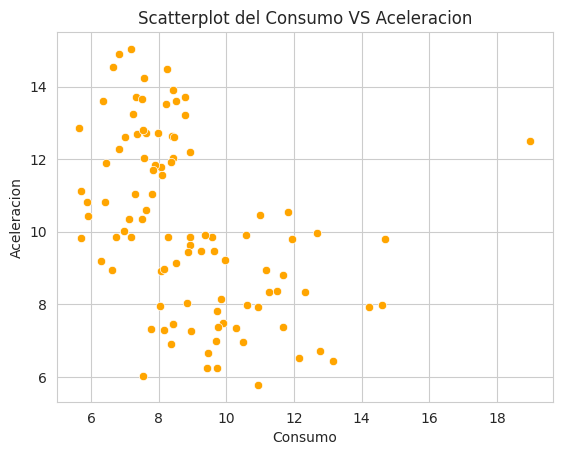

In [ ]:
sns.scatterplot(data=data, x="Consumo", y="Aceleracion", color="orange")

plt.title("Scatterplot del Consumo VS Aceleracion")

plt.show()

Hay una relación negativa(un variable aumenta y la otra disminuye) entre las variables porque a mayor aceleración el consumo es menor. 

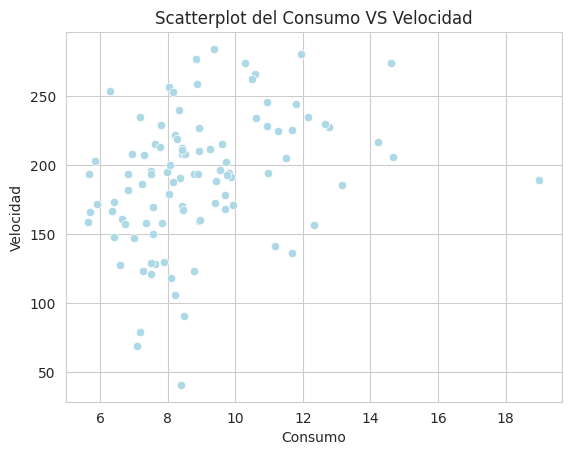

In [ ]:
# Gráfico de dispersión (scatterplot) de "Consumo" vs "Velocidad"
sns.scatterplot(data=data, x="Consumo", y="Velocidad", color="lightblue")

# Agregar título al gráfico
plt.title("Scatterplot del Consumo VS Velocidad")

# Mostrar el gráfico
plt.show()

No hay correlacion entre las variables

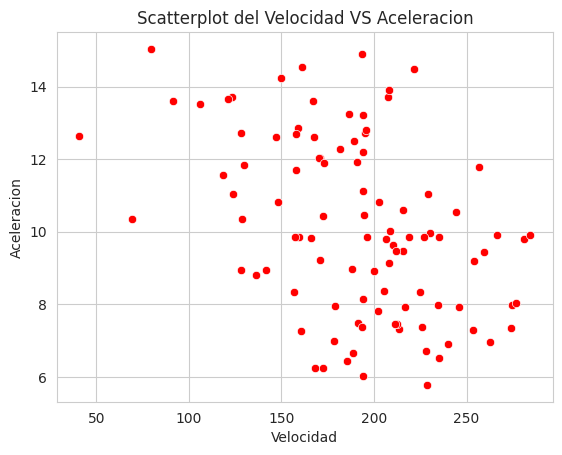

In [ ]:
# Gráfico de dispersión (scatterplot) de "Velocidad" vs "Aceleracion"
sns.scatterplot(data=data, x="Velocidad", y="Aceleracion", color="red")

# Agregar título al gráfico
plt.title("Scatterplot del Velocidad VS Aceleracion")

# Mostrar el gráfico
plt.show()

Datos dispersos, no hay correlacion entre las variables

#### Boxplots stratificados

In [ ]:
sns.set_palette("Paired")

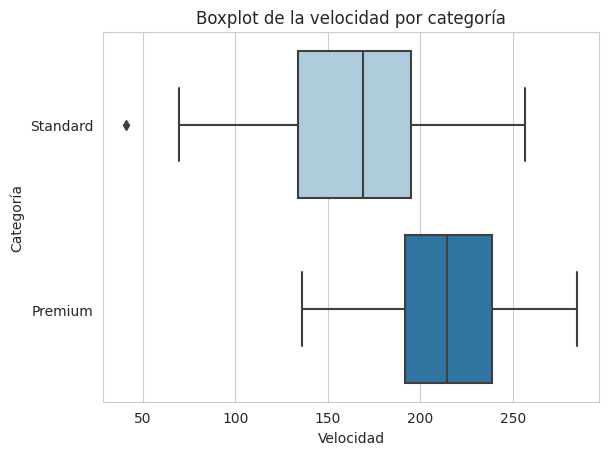

In [ ]:
# Gráfico de cajas y bigotes (boxplot) de "Velocidad" por "Categoría"
sns.boxplot(data=data, x="Velocidad", y="Categoría")

# Agregar título al gráfico
plt.title("Boxplot de la velocidad por categoría")

# Mostrar el gráfico
plt.show()

Los autos premium toman valores mas altos de velocidad.
En la velocidad de los Standard se puede identificar un outlier.

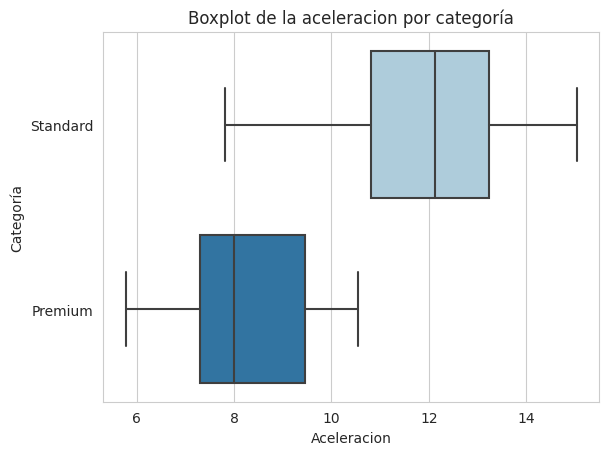

In [ ]:
sns.boxplot(data = data, x = "Aceleracion", y = "Categoría")
plt.title("Boxplot de la aceleracion por categoría")
plt.show()

No hay outliers. Los standard toman más tiempo en acelerar que los Premium

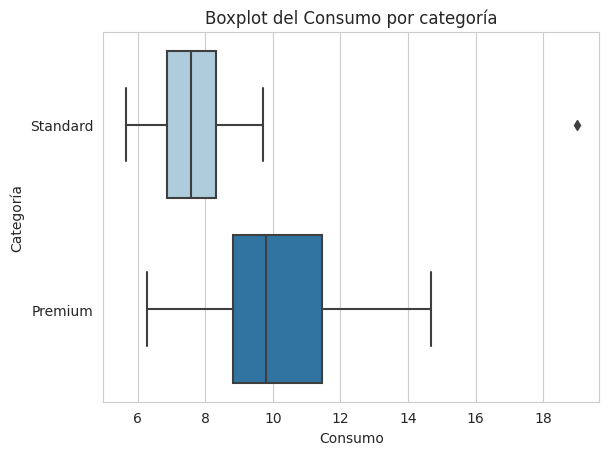

In [ ]:
sns.boxplot(data = data, x = "Consumo", y = "Categoría")
plt.title("Boxplot del Consumo por categoría")
plt.show()

Los premium tienen un mayor consumo que los standard. 
Outlier en consumo para standard.

#### Diagramas de dispersión estratificados

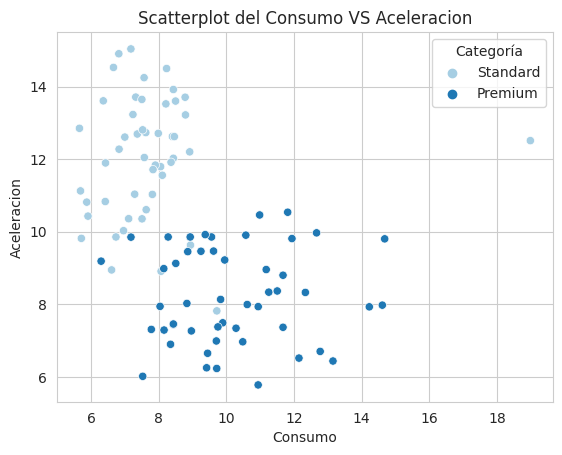

In [ ]:
sns.scatterplot(data = data, x = "Consumo", y = "Aceleracion", hue = "Categoría")
plt.title("Scatterplot del Consumo VS Aceleracion")
plt.show()

Los standard toman más tiempo en acelerar pero lo hacen con menor consumo.
Los premium tienen mayor consumo de combustible pero aceleran en menor tiempo.

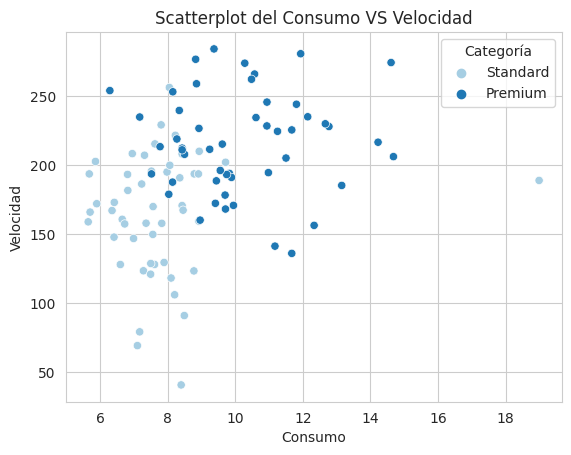

In [ ]:
sns.scatterplot(data = data, x = "Consumo", y = "Velocidad", hue = "Categoría")
plt.title("Scatterplot del Consumo VS Velocidad")
plt.show()

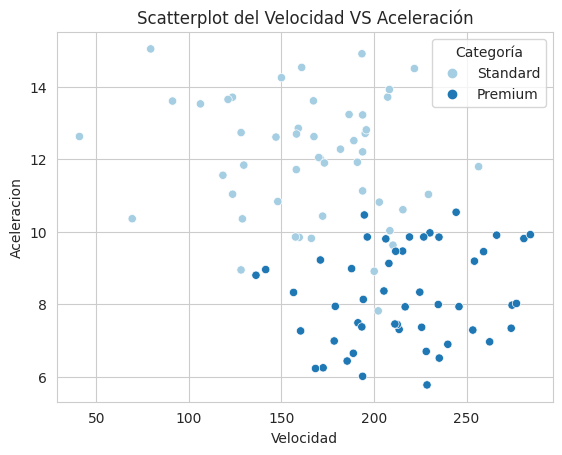

In [ ]:
sns.scatterplot(data = data, x = "Velocidad", y = "Aceleracion", hue = "Categoría")
plt.title("Scatterplot del Velocidad VS Aceleración")
plt.show()

### Nueva columna

In [ ]:
# Crear una nueva columna "ecologico" en el DataFrame "data" que indica si un coche es ecológico o no, basándose en el valor de su consumo
data["ecologico"] = data.Consumo < 7

# Convertir los valores booleanos de la columna "ecologico" a cadenas de texto ("True" y "False")
data["ecologico"] = data["ecologico"].astype("str")

#### Boxplots stratificados

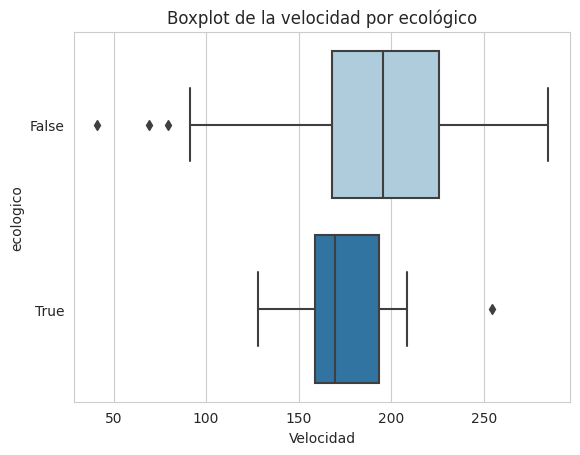

In [ ]:
sns.boxplot(data = data, x = "Velocidad", y = "ecologico")
plt.title("Boxplot de la velocidad por ecológico")
plt.show()

In [ ]:
sns.boxplot(data = data, x = "Aceleracion", y = "ecologico")
plt.title("Boxplot de la aceleracion por ecológico")
plt.show()

In [ ]:
sns.boxplot(data = data, x = "Consumo", y = "ecologico")
plt.title("Boxplot del Consumo por ecológico")
plt.show()

#### Diagramas de dispersión estratificados

In [ ]:
sns.scatterplot(data = data, x = "Consumo", y = "Aceleracion", hue = "ecologico")
plt.title("Scatterplot del Consumo VS Aceleracion")
plt.show()

In [ ]:
sns.scatterplot(data = data, x = "Consumo", y = "Velocidad", hue = "ecologico")
plt.title("Scatterplot del Consumo VS Velocidad")
plt.show()

In [ ]:
sns.scatterplot(data = data, x = "Velocidad", y = "Aceleracion", hue = "ecologico")
plt.title("Scatterplot del Velocidad VS Aceleración")
plt.show()